# Model testing
after cleaning the data, i want to test different models to see the effectiveness of them

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
pd.set_option("display.max_columns", None)

In [24]:
int_mat = pd.read_csv(r'int_mat_updated.csv')
last_scores = pd.read_csv(r'last_scores_updated.csv')

In [25]:
X = int_mat.copy()
X.drop(["home_team", "away_team","home_team_result"], axis=1, inplace=True)

y = int_mat["home_team_result"] 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [26]:
X

Unnamed: 0  home_team_fifa_rank  away_team_fifa_rank  \
0               0                   59                   22   
1               1                    8                   14   
2               2                   35                   94   
3               3                   65                   86   
4               4                   67                    5   
...           ...                  ...                  ...   
23916       23916                  180                  153   
23917       23917                  192                  135   
23918       23918                   28                   60   
23919       23919                   23                   35   
23920       23920                   29                   32   

       home_team_total_fifa_points  away_team_total_fifa_points  \
0                                0                            0   
1                                0                            0   
2                                0                            0   
3                                0                            0   
4                                0                            0   
...                            ...                          ...   
23916                          932                         1040   
23917                          895                         1105   
23918                         1526                         1387   
23919                         1553                         1499   
23920                         1519                         1500   

       neutral_location  home_team_goalkeeper_score  \
0                     0                   74.963838   
1                     0                   74.963838   
2                     0                   74.963838   
3                     0                   74.963838   
4                     0                   74.963838   
...                 ...                         ...   
23916                 0                   65.000000   
23917                 0                   74.963838   
23918                 1                   79.000000   
23919                 0                   73.000000   
23920                 0                   75.000000   

       away_team_goalkeeper_score  home_team_mean_defense_score  \
0                       74.212477                     74.903249   
1                       74.212477                     74.903249   
2                       74.212477                     74.903249   
3                       74.212477                     74.903249   
4                       74.212477                     74.903249   
...                           ...                           ...   
23916                   74.212477                     74.903249   
23917                   65.000000                     74.903249   
23918                   74.000000                     75.500000   
23919                   74.212477                     75.200000   
23920                   74.212477                     73.000000   

       home_team_mean_offense_score  home_team_mean_midfield_score  \
0                         75.818743                      75.889292   
1                         75.818743                      75.889292   
2                         75.818743                      75.889292   
3                         75.818743                      75.889292   
4                         75.818743                      75.889292   
...                             ...                            ...   
23916                     75.818743                      75.889292   
23917                     75.818743                      75.889292   
23918                     76.700000                      78.200000   
23919                     75.000000                      77.500000   
23920                     80.000000                      73.800000   

       away_team_mean_defense_score  away_team_mean_offense_score  \
0                         74.424379                     75.420019   


In [27]:
y

0        1
1        0
2        1
3        1
4       -1
        ..
23916    1
23917   -1
23918   -1
23919   -1
23920    1
Name: home_team_result, Length: 23921, dtype: int64

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
predictions = model.predict(X_test)
predictions = pd.DataFrame(predictions) 
predictions.columns = ["preds"]
predictions

,preds
0,0.858779
1,1.444765
2,-0.189612
3,-0.220937
4,0.569871
...,...
4780,-0.551015
4781,-0.392220
4782,0.515377
4783,0.302004


ranges i would like to do:
1. Home win (1) if prediction is more than 0.1
2. Home lose (-1) if prediction is less than -0.1
3. Draw if prediction is more than -0.1 and less than 0.1

In [30]:
def cat(x):
    if x <-0.153: #ranges were updated after exploring the accuracies of ranges
        return -1
    if x > 0.153:
        return 1
    if  0.153 > x > -0.153:
        return 0
    

predictions["outcome"] = predictions["preds"].apply(lambda x: cat(x))

In [31]:
predictions

,preds,outcome
0,0.858779,1
1,1.444765,1
2,-0.189612,-1
3,-0.220937,-1
4,0.569871,1
...,...,...
4780,-0.551015,-1
4781,-0.392220,-1
4782,0.515377,1
4783,0.302004,1


In [32]:
metrics.accuracy_score(y_test, predictions["outcome"])

0.573876698014629

In [33]:
metrics.f1_score(y_test, predictions["outcome"], average="weighted")

0.5674205604288115

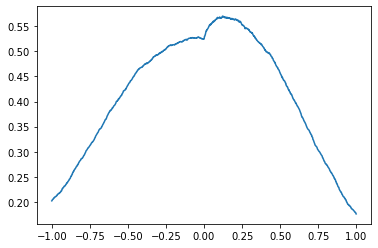

In [34]:
predictions = model.predict(X_test)
predictions = pd.DataFrame(predictions) 
predictions.columns = ["preds"]
x = []
y = []

def testcat(x,i):
    if x <-(i/1000):
        return -1
    if x > (i/1000):
        return 1
    if  (i/1000) > x > -(i/1000):
        return 0
    
for i in range(-1000,1000):
    predictions["outcome"] = predictions["preds"].apply(lambda x: testcat(x,i))
    accuracy = metrics.f1_score(y_test, predictions["outcome"], average="weighted")
    x.append(i/1000)
    y.append(accuracy)
    

plt.plot(x, y)

In [35]:
max_value_y = np.max(y)
max_index = y.index(max_value_y)
max_value_x = x[max_index]
print("max x = "+ str(max_value_x))
print("max y = "+ str(max_value_y))

max x = 0.124
max y = 0.5698794499368696


The most accurate the model can be (based on f1 score) is 0.5786

## testing different models


In [36]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
def metrics_display(model):
    model.fit(X_train,y_train)
    
    predictions = model.predict(X_test)
    predictions = pd.DataFrame(predictions) 
    predictions.columns = ["preds"]
    
    predictions["outcome"] = predictions["preds"].apply(lambda x: cat(x))
    print(classification_report(y_test,predictions["outcome"]))
    ConfusionMatrixDisplay.from_predictions(y_test,predictions["outcome"]);
    
#source: https://github.com/davidcamilo0710/QATAR_2022_Prediction/blob/master/Modeling%2BTuning.ipynb

              precision    recall  f1-score   support

          -1       0.53      0.54      0.53      1342
           0       0.27      0.12      0.17      1071
           1       0.64      0.78      0.70      2372

    accuracy                           0.57      4785
   macro avg       0.48      0.48      0.47      4785
weighted avg       0.52      0.57      0.54      4785



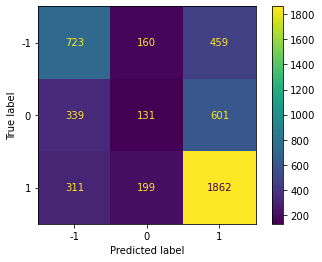

In [37]:
from sklearn.ensemble import RandomForestClassifier
metrics_display(RandomForestClassifier())

              precision    recall  f1-score   support

          -1       0.53      0.58      0.55      1342
           0       0.25      0.00      0.01      1071
           1       0.61      0.85      0.71      2372

    accuracy                           0.58      4785
   macro avg       0.46      0.48      0.42      4785
weighted avg       0.51      0.58      0.51      4785



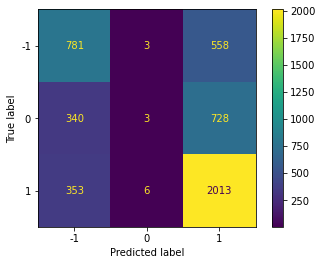

In [38]:
from sklearn.ensemble import AdaBoostClassifier
metrics_display(AdaBoostClassifier())

              precision    recall  f1-score   support

          -1       0.63      0.46      0.53      1342
           0       0.28      0.28      0.28      1071
           1       0.67      0.77      0.72      2372

    accuracy                           0.57      4785
   macro avg       0.53      0.50      0.51      4785
weighted avg       0.57      0.57      0.57      4785



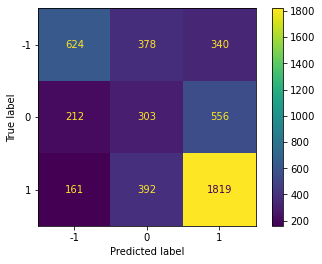

In [39]:
from sklearn.linear_model import LinearRegression
metrics_display(LinearRegression())

              precision    recall  f1-score   support

          -1       0.50      0.51      0.51      1342
           0       0.28      0.17      0.21      1071
           1       0.64      0.74      0.69      2372

    accuracy                           0.55      4785
   macro avg       0.47      0.47      0.47      4785
weighted avg       0.52      0.55      0.53      4785



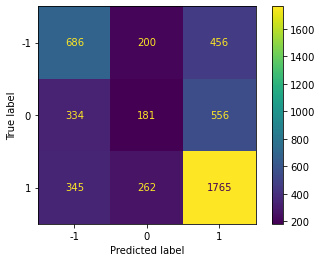

In [40]:
from sklearn.ensemble import ExtraTreesClassifier
metrics_display(ExtraTreesClassifier())

              precision    recall  f1-score   support

          -1       0.45      0.46      0.45      1342
           0       0.27      0.26      0.26      1071
           1       0.62      0.64      0.63      2372

    accuracy                           0.50      4785
   macro avg       0.45      0.45      0.45      4785
weighted avg       0.50      0.50      0.50      4785



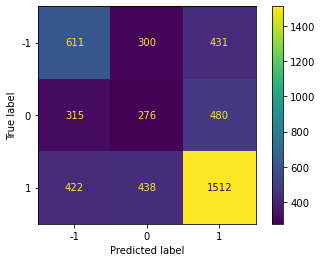

In [41]:
from sklearn.tree import DecisionTreeClassifier
metrics_display(DecisionTreeClassifier())

              precision    recall  f1-score   support

          -1       0.55      0.57      0.56      1342
           0       0.17      0.01      0.02      1071
           1       0.61      0.86      0.71      2372

    accuracy                           0.59      4785
   macro avg       0.44      0.48      0.43      4785
weighted avg       0.50      0.59      0.51      4785



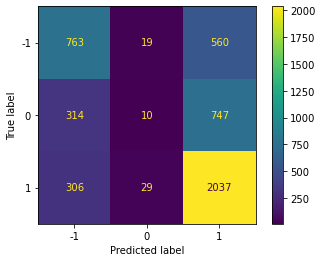

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
metrics_display(GradientBoostingClassifier())

linear regression works the best, therefore ill use that for the world cup predictions!